# Análise de Preferências do Consumidor # 

# Consumer Preference Analysis #

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('smartphones.csv')

In [3]:
features = df[['processor_speed', 'battery_capacity', 'screen_size', 'ram_capacity']]


In [4]:
imputer = SimpleImputer(strategy='mean')
features = imputer.fit_transform(features)

In [5]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [6]:
kmeans = KMeans(n_clusters=3)  
kmeans.fit(scaled_features)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid

KMeans(n_clusters=3)

In [7]:
df['cluster'] = kmeans.labels_

In [8]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
df['pca1'] = reduced_features[:, 0]
df['pca2'] = reduced_features[:, 1]

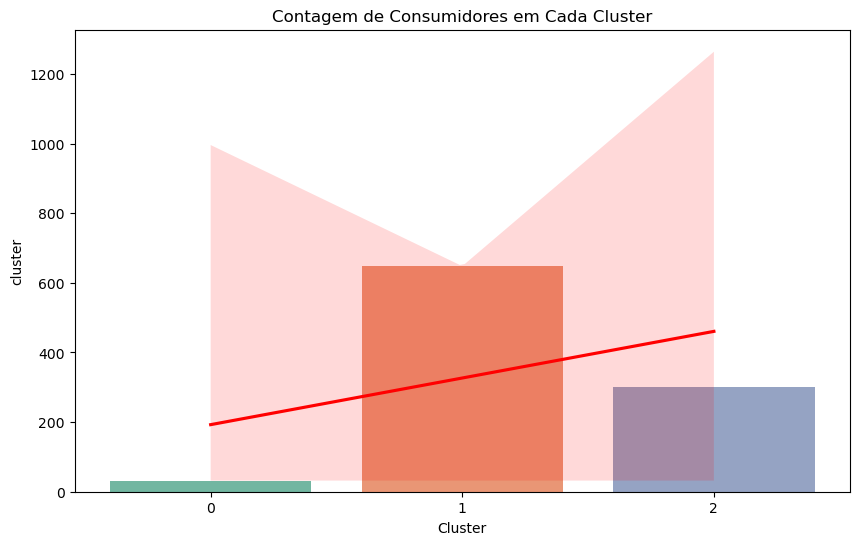

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cluster', palette='Set2')
plt.xlabel('Cluster')
plt.ylabel('Contagem de Consumidores')
plt.title('Contagem de Consumidores em Cada Cluster')

sns.regplot(x=np.arange(len(df['cluster'].unique())), y=df['cluster'].value_counts().sort_index(), scatter=False, color='red')

plt.show()